# Zillow Single Family Property Preditor
by Meredith Wang July-27-2022


<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>

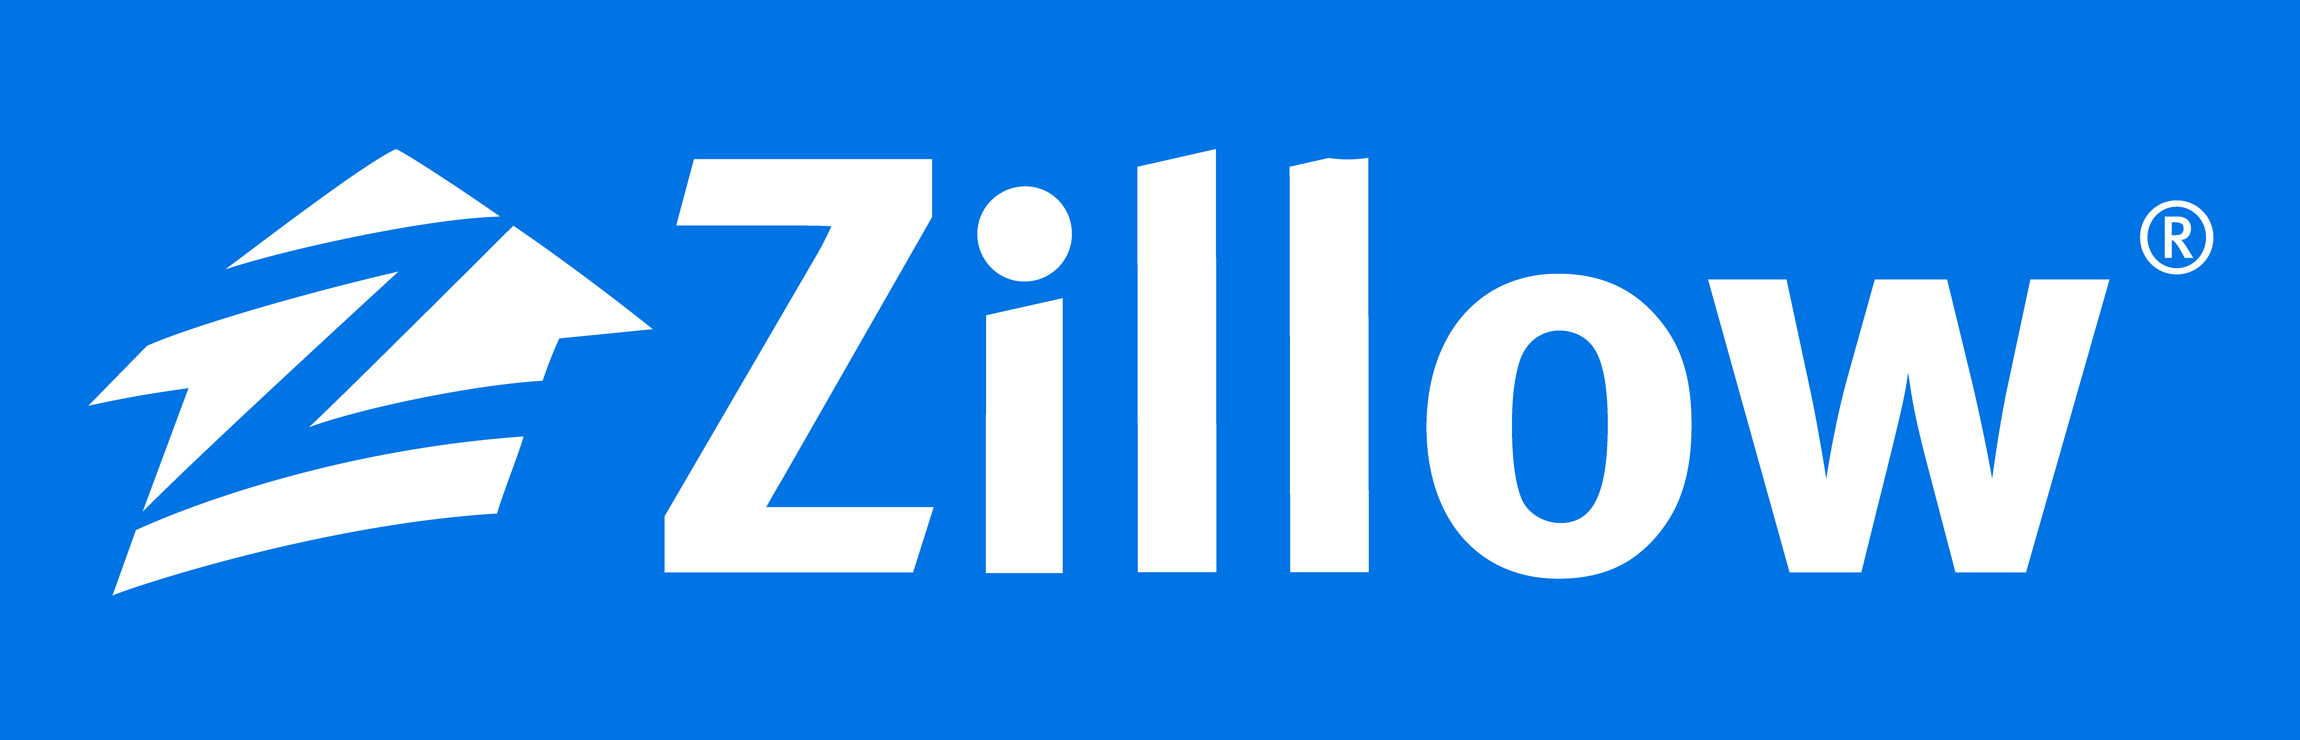

# 🏘️ Project Goal

▪️

# 📃 Project Description

# 📝 Initial Questions

# 📚 Data Dictionary

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">Latitude</span> | Float number| Latitude of the middle of the parcel
<span style="background-color: #ffe0bd">Longitude</span> | Float number | Longitude of the middle of the parcel
<span style="background-color: #ffe0bd">Bedrooms</span> | Integer ranging from 1-6 | Number of bedrooms in home
<span style="background-color: #ffe0bd">Bathrooms</span>| Float ranging from 0.5-6.5 | Number of bathrooms in home including fractional bathrooms
<span style="background-color: #ffe0bd">Square Feet</span>| Float number| Calculated total finished living area of the home
<span style="background-color: #ffe0bd">Lot Size</span> | Float number | Area of the lot in square feet
<span style="background-color: #ffe0bd">Age</span> | Integer | This indicate the age of the property in 2017, calculated using the year the principal residence was built
<span style="background-color: #ffe0bd">Assessed Value</span> | Float number | The total tax assessed value of the parcel
<span style="background-color: #ffe0bd">Tax Amount</span> | Float number | The total property tax assessed for that assessment year
<span style="background-color: #ffe0bd">County</span> | 1) Ventura 2) Los Angeles 3) Orange | County in which the property is located
<span style="background-color: #ffe0bd">Bedrooms Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bedrooms; Medium: 3-4 bedrooms; Large: 5-6 bedrooms
<span style="background-color: #ffe0bd">Bathroom Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bathrooms; Medium: 3-4 bathrooms; Large: 5-6 bathrooms

# 🧮 Wrangle Zillow Data

## 1. Data Acquisition
▪️ Stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

▪️ To acquire the zillow data for singel family properties, I used the **zillow** database in the mySQL server, and joined the following tables to gather data: <samp>`properties_2017, predictions_2017, propertylandusetype`</samp>

▪️ Created **acquire.py** and user-defined function `get_zillow_data()` to acquire and cache data.

In [1]:
# Import essential libraries
from imports import *

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_zillow_data()

# Check the shape of our messy dataframe
messy_df.shape

(52441, 11)

## 2. Data Preparation - Data Cleaning 🧹 

▪️ **Missing Values:**
- Column `has_pool` null values are replaced with 0
    
- All other null values are dropped

▪️ **Data Types:**
- Column `age` is converted **int** datatype

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`
- Created new column `bedrooms_size`, `bathrooms_size` corresponding to `bedrooms`, `bathrooms` value

▪️ **Dummy variables: created dummy variables for binary and non-binary categorical variables**

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution


In [2]:
# Cleaning the data using function from prepare.py
df = prepare.prep_zillow(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(47058, 23)

## 3. Data Preparation - Splitting Data 🗂

In [3]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = prepare.split(df)

# Checking the size of each dataset
train.shape, validate.shape, test.shape

((26352, 23), (11294, 23), (9412, 23))

# 📊 Data Context

We have data of **47128** single family properties. **5** categorical variables and **7** numerical variables.

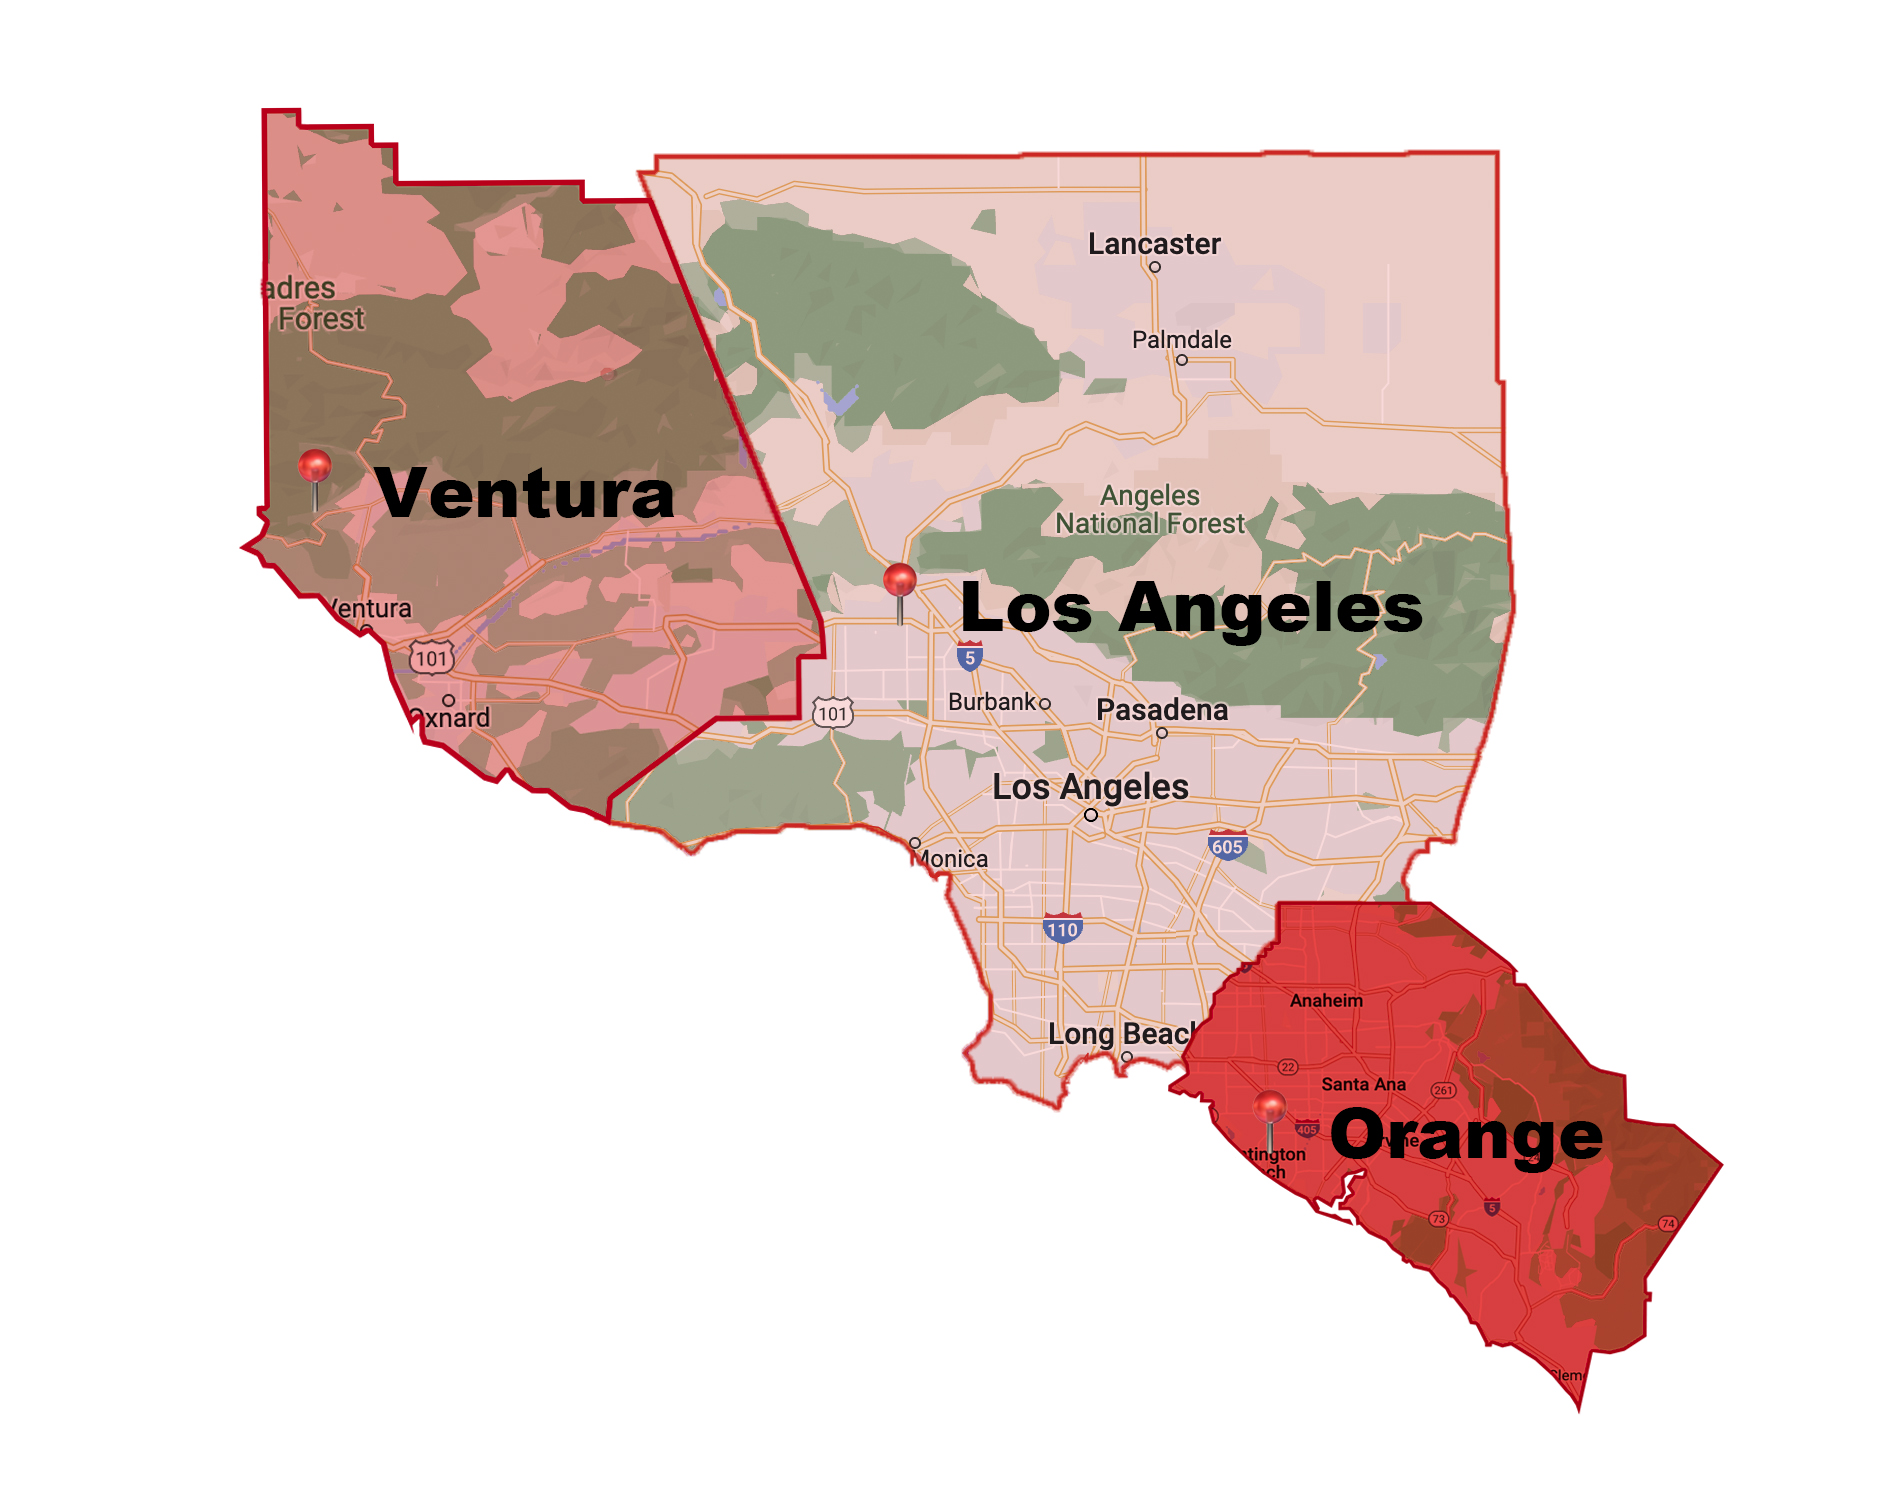

# 👩🏻‍💻 Exploratory Analysis

> ## Question 1. What associated with `assessed_value` the most?

<AxesSubplot:>

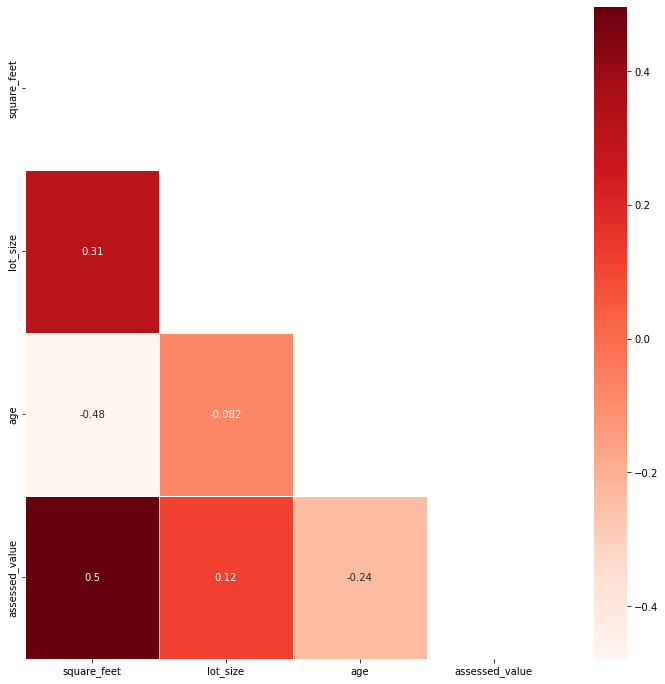

In [4]:
# Input continuous features
continuous_cols = ['square_feet', 'lot_size', 'age', 'assessed_value']

# Calcualte correlation between features
train_corr = train[continuous_cols].corr()

# Visualize correlaiton
plt.figure(figsize = (12,12))
sns.heatmap(train_corr,cmap='Reds', annot=True, linewidth=0.5, mask= np.triu(train_corr))

Text(0.5, 1.0, 'Assessed Value by Square Feet')

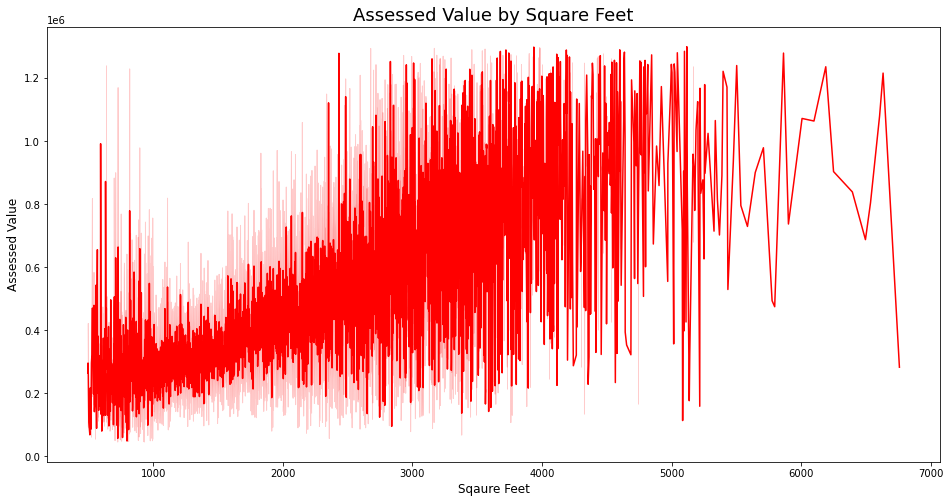

In [7]:
# Visualizing how square feet is correlated with assessed value
plt.figure(figsize = (16,8))
sns.lineplot(x = train.square_feet, y = train.assessed_value, color = 'red', data = train)
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)
plt.title('Assessed Value by Square Feet', fontsize = 18)

> ## Answer 1:
**square_feet** has strong positive (0.58) correlation with **assessed_value**

***

> ## Question 2. Is `assessed_value` significantly different across 3 different counties?

In [21]:
fig = px.box(train, x="county", y="assessed_value", points="all", color = 'county', color_discrete_sequence=["#006ba4",'#ff800e','#D4F6CC' ])
fig.update_xaxes(categoryorder = 'mean ascending')
fig.show()

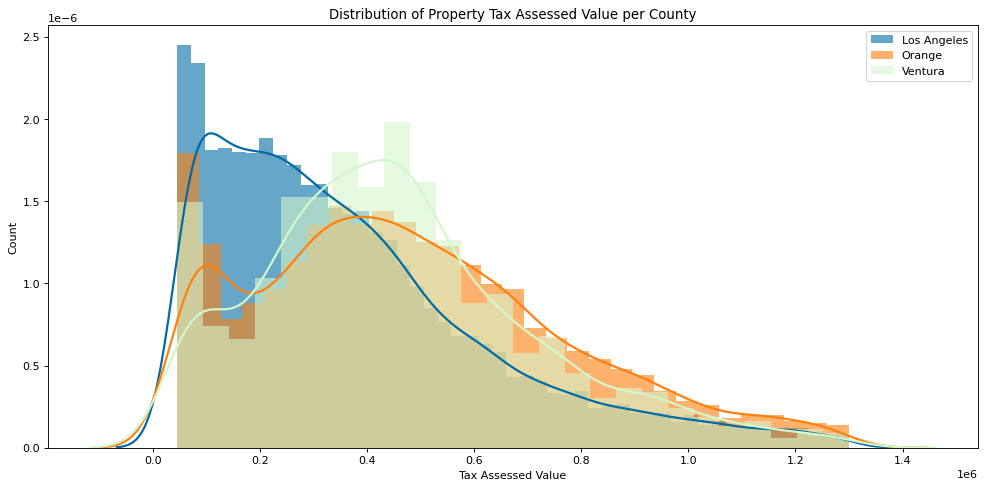

In [6]:
# Visualizing distribution of assessed_value per county

losangeles = train[train['county'] == 'Los Angeles'].assessed_value
orange = train[train['county'] == 'Orange'].assessed_value
ventura = train[train['county'] == 'Ventura'].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(losangeles, color="#006ba4", label="Los Angeles", **kwargs)
sns.distplot(orange, color="#ff800e", label="Orange", **kwargs)
sns.distplot(ventura, color="#D4F6CC", label="Ventura", **kwargs)
plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value per County')
plt.legend();

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are all equal.

$H_{a}$: Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal.

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [18]:
# Set alpha
alpha = 0.05

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(losangeles, orange, ventura)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. 


***

## Question 3. Is having pool positively associated with `assessed value`?

In [19]:
# Visualizing the five-number summary of properties with pool and without pool

fig = px.box(train, x="has_pool", y="assessed_value", points="all", color = 'has_pool', color_discrete_sequence=['#ff800e','#006ba4'])
fig.show()

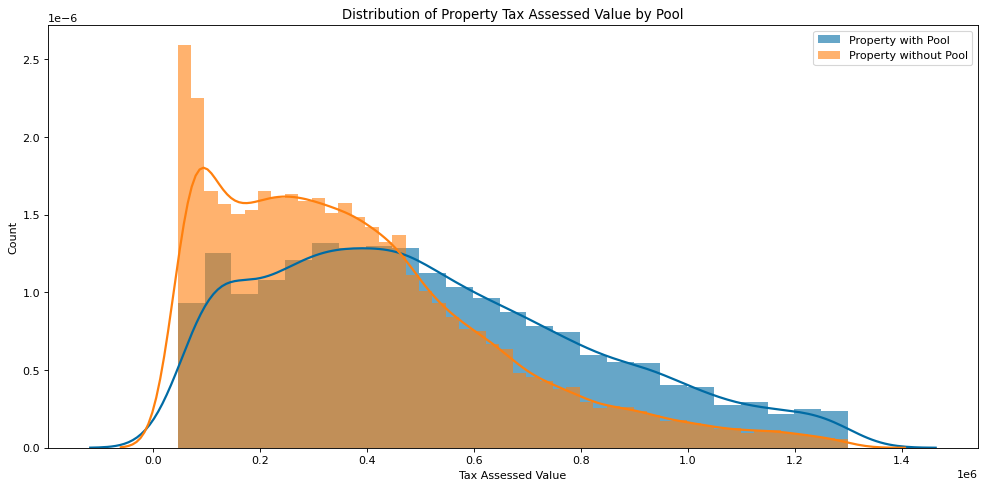

In [22]:
# Visualizing distribution of assessed_value for has_pool or not

pool = train[train['has_pool'] == 1].assessed_value
no_pool = train[train['has_pool'] == 0].assessed_value

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(pool, color="#006ba4", label="Property with Pool", **kwargs)
sns.distplot(no_pool, color="#ff800e", label="Property without Pool", **kwargs)

plt.xlabel('Tax Assessed Value')
plt.ylabel('Count')
plt.title('Distribution of Property Tax Assessed Value by Pool')
plt.legend();

### Independent T-Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of property with pool <= Mean of property tax assessed value of property without pool.

$H_{a}$: Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool.

In [27]:
# Set alpha
alpha = 0.05

# Comparing mean of 2 independent samples
t, p = stats.ttest_ind(pool, no_pool, equal_var=False)

# Decide and draw conclusion
if p/2 < alpha:
    print("We reject H0.")
    print(Fore.BLUE+"\nMean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. ")
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of property with pool > Mean of property tax assessed value of property without pool. 


## Answer 3:
Proepeties with pool has a higher tax assessed value on average than properties without pool.

***

## Question 4. Is number of bedrooms and bathrooms associated with `assessed value`?

### 🛏️ Bedrooms 

In [37]:
# Visualizing the 5-number summary of property assessed value of different size of bedrooms

fig = px.box(train, x="bedrooms_size", y="assessed_value", points="all", color = 'bedrooms_size',  color_discrete_sequence=[ '#fec44f','#993404','#ffffd4'])
fig.update_layout(title_text='Property Assessed Value per Bedrooms Size', title_x=0.5)
fig.update_xaxes(categoryorder = 'category descending')

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bedrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bedrooms are not all equal.

In [33]:
# Set alpha
alpha = 0.05

# Comparing mean of each sample and draw conclusion
smallbed = train[train['bedrooms_size']=='small'].assessed_value
mediumbed = train[train['bedrooms_size']=='medium'].assessed_value
largebed = train[train['bedrooms_size']=='large'].assessed_value

# Decide and draw conclusion
t, p = stats.f_oneway(smallbed, mediumbed, largebed)
if p < alpha:
    print("We reject H0. ")
    print(Fore.BLUE +"\nMean of property tax assessed value of small, medium, large bedrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0. 

Mean of property tax assessed value of small, medium, large bedrooms are not all equal. 


### 🛁  Bathrooms 

In [38]:
# Visualizing the 5-number summary of property assessed value of different size of bathroom
fig = px.box(train, x="bathrooms_size", y="assessed_value", points="all", color = 'bathrooms_size', color_discrete_sequence=['#5d89af','#a9c2d5','#383f45'])
fig.update_xaxes(categoryorder = 'category descending')
fig.update_layout(title_text='Property Assessed Value per Bathrooms Size', title_x=0.5)
fig.show()

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Mean of property tax assessed value of small, medium, large bathrooms are all equal.

$H_{a}$: Mean of property tax assessed value of small, medium, large bathrooms are not all equal.

In [41]:
# Set alpha
alpha = 0.05

# Comparing mean of independent sample
smallbath = train[train['bathrooms_size']=='small'].assessed_value
mediumbath = train[train['bathrooms_size']=='medium'].assessed_value
largebath = train[train['bathrooms_size']=='large'].assessed_value

# Decide and draw conclusion
t, p = stats.f_oneway(smallbath, mediumbath, largebath)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE+ "\nMean of property tax assessed value of small, medium, large bathrooms are not all equal. ")
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of small, medium, large bathrooms are not all equal. 


## Answer 4:

Property tax assessed value is dependent on the size of bedrooms and bathrooms.

***

# 🧪 Modeling

## Baseline Prediction

> ## PROJECT GOAL